In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [14]:
from sklearn import (datasets,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     neighbors)

In [15]:
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [16]:
pd.options.display.float_format = '{:20,.4f}'.format

In [17]:
diabetes = datasets.load_diabetes()

tts = skms.train_test_split(diabetes.data,
                            diabetes.target,
                            test_size=.25)

(diabetes_train_ftrs, diabetes_test_ftrs,
diabetes_train_tgt,  diabetes_test_tgt) = tts

In [18]:
diabetes_df = pd.DataFrame(diabetes.data,
                           columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


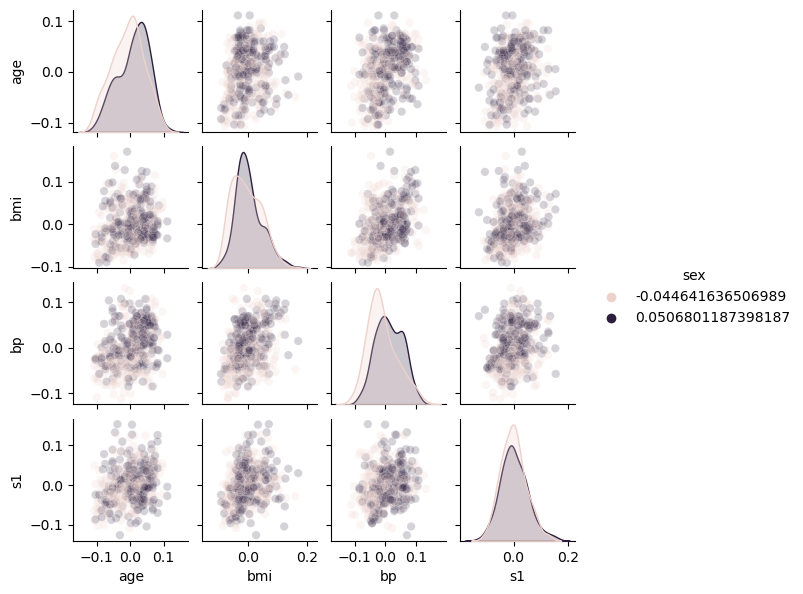

In [19]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']],
             height=1.5, hue='sex', plot_kws={'alpha':.2});

In [21]:
values = np.array([1, 3, 5, 8, 11, 13, 15])
print("no outlier")
print(np.mean(values), np.median(values))

values_with__outlier = np.array([1, 3, 5, 8, 11, 13, 40])
print("with outlier")
print("%5.2f" % np.mean(values_with__outlier), np.median(values_with__outlier))

no outlier
8.0 8.0
with outlier
11.57 8.0


In [22]:
distances = np.array([2.0, 4.0, 4.0])
closeness = 1.0 / distances
weights = closeness / np.sum(closeness)
weights

array([0.5 , 0.25, 0.25])

In [23]:
values = np.array([4, 6, 8])

mean = np.mean(values)
wgt_mean = np.dot(values, weights)

print("Mean:", mean)
print("Weight Mean:", wgt_mean)

Mean: 6.0
Weight Mean: 5.5


In [24]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

metrics.mean_squared_error(diabetes_test_tgt, preds)

3471.41941941942

In [25]:
np.sqrt(3500)

59.16079783099616

In [26]:
diabetes_df["target"].max() - diabetes_df["target"].min()

321.0

In [27]:
def axis_helper(ax, lims):

    ax.set_xlim(lims); ax.set_xticks([])
    ax.set_ylim(lims); ax.set_yticks([])
    ax.set_aspect('equal')

In [28]:
D = np.array([[3, 5],
             [4,2]])

x,y = D[:,0], D[:,1]

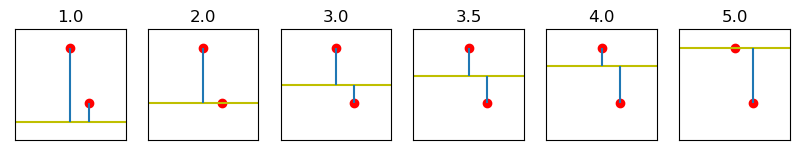

In [30]:
horizontal_lines = np.array([1, 2, 3, 3.5, 4, 5])

results = []
fig, axes = plt.subplots(1, 6, figsize=(10, 5))
for h_line, ax in zip(horizontal_lines, axes.flat):
    axis_helper(ax, (0, 6))
    ax.set_title(str(h_line))
    
    ax.plot(x, y, 'ro')
    
    ax.axhline(h_line, color='y')
    
    predictions = h_line
    ax.vlines(x, predictions, y)
    
    errors = y - predictions
    sse = np.dot(errors, errors)
    
    results.append((predictions, errors, errors.sum(), sse, np.sqrt(sse)))

In [31]:
col_labels = "Prediction", "Errors", "Sum", "SSE", "Distance"
display(pd.DataFrame.from_records(results,
                                 columns=col_labels,
                                 index="Prediction"))

,Errors,Sum,SSE,Distance
Prediction,,,,
1.0000,"[4.0, 1.0]",5.0000,17.0000,4.1231
2.0000,"[3.0, 0.0]",3.0000,9.0000,3.0000
3.0000,"[2.0, -1.0]",1.0000,5.0000,2.2361
3.5000,"[1.5, -1.5]",0.0000,4.5000,2.1213
4.0000,"[1.0, -2.0]",-1.0000,5.0000,2.2361
5.0000,"[0.0, -3.0]",-3.0000,9.0000,3.0000


In [32]:
def process(D, model, ax):
    x,y = D[:,0], D[:,1]
    m,b = model   
    
    axis_helper(ax, (0,8))
    
    ax.plot(x,y,'ro')

    helper_xs   = np.array([0,8])
    helper_line = m * helper_xs + b 
    ax.plot(helper_xs, helper_line, color='y')
    
    predictions = m * x + b
    ax.vlines(x, predictions, y)
    
    errors = y - predictions

    sse = np.dot(errors, errors) 
    return (errors, errors.sum(), sse, np.sqrt(sse))

,Raw Errors,Sum,SSE,TotDist
0,"[2, -2]",0,8,2.8284
1,"[1, -3]",-2,10,3.1623
2,"[0, -4]",-4,16,4.0000
3,"[0, -2]",-2,4,2.0000
4,"[0, 0]",0,0,0.0000


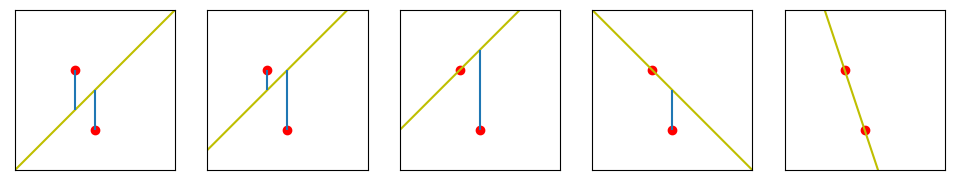

In [35]:
D = np.array([[3, 5],
              [4, 2]])

lines_mb = np.array([[1, 0],
                    [1, 1],
                    [1, 2],
                    [-1, 8],
                    [-3, 14]])

col_labels = ("Raw Errors", "Sum", "SSE", "TotDist")
results = []

fig, axes = plt.subplots(1, 5, figsize=(12, 6))
records = [process(D, mod, ax) for mod, ax in zip(lines_mb, axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)
display(df)

In [36]:
lr = linear_model.LinearRegression()
fit = lr.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

metrics.mean_squared_error(diabetes_test_tgt, preds)

2848.2953079329427

In [37]:
tgt = np.array([3, 5, 8, 10, 12, 15])

In [38]:
num_guesses = 10
results = []

for g in range(num_guesses):
    guess = np.random.uniform(low=tgt.min(), high=tgt.max())
    total_dist = np.sum((tgt - guess)**2)
    results.append((total_dist, guess))
best_guess = sorted(results)[0][1]
best_guess

8.228074784134693

In [39]:
num_steps = 100
step_size = .05

best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist = np.sum((tgt - best_guess)**2)

for s in range(num_steps):
    new_guess = best_guess + (np.random.choice([+1, -1]) * step_size)
    new_dist = np.sum((tgt - new_guess)**2)
    if new_dist < best_dist:
        best_guess, best_dist = new_guess, new_dist
print(best_guess)

8.836959712695537


In [41]:
num_steps = 1000
step_size = 0.02
best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist = np.sum((tgt - best_guess) ** 2)
print("start:", best_guess)

for s in range(num_steps):
    guesses = best_guess + (np.array([-1, 1]) * step_size)
    dists = np.sum((tgt[:, np.newaxis] - guesses) ** 2, axis=0)

    better_idx = np.argmin(dists)
    if dists[better_idx] > best_dist:
        break

    best_guess = guesses[better_idx]
    best_dist = dists[better_idx]

print(" end:", best_guess)

start: 8.081651307697422
 end: 8.841651307697406


In [42]:
print("mean:", np.mean(tgt))

mean: 8.833333333333334


In [44]:
diabetes = datasets.load_diabetes()
tts = skms.train_test_split(diabetes.data,
                            diabetes.target,
                            test_size=.25)

(diabetes_train_ftrs, diabetes_test_ftrs,
 diabetes_train_tgt, diabetes_test_tgt) = tts

models = {'kNN': neighbors.KNeighborsRegressor(n_neighbors=3),
          'linreg': linear_model.LinearRegression()}

for name, model in models.items():
    fit = model.fit(diabetes_train_ftrs, diabetes_train_tgt)
    preds = fit.predict(diabetes_test_ftrs)

    score = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt, preds))
    print("{:>6s} : {:.2f}".format(name, score))

   kNN : 60.98
linreg : 51.76
